In [1]:
import os
import io
from google.cloud import vision
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
# Authenticate user
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="gleaming-store-318714-fa3a393f498e.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [9]:
path = './images/hawa_mahal.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [10]:
response = client.landmark_detection(image=image)
landmarks = response.landmark_annotations
print('Landmarks:')

for landmark in landmarks:
    print(landmark.description)
    for location in landmark.locations:
        lat_lng = location.lat_lng
        print('Latitude {}'.format(lat_lng.latitude))
        print('Longitude {}'.format(lat_lng.longitude))


Landmarks:
Jantar Mantar - Jaipur
Latitude 26.924761999999998
Longitude 75.82455999999999


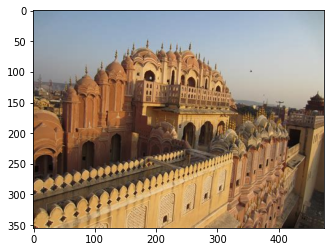

In [11]:
# Read image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)